# For vgg16

In [0]:
from keras.applications.vgg16 import VGG16

# Load the VGG model
pre_trained_model = VGG16(input_shape = (224, 224, 3), 
                                include_top = False)


Using TensorFlow backend.






58892288/58889256 [==============================] - 1s 0us/step








In [0]:
# Freeze the layers except the last 1 layers
#for layer in pre_trained_model.layers[:-4]:
#  layer.trainable = False
  
# Check the trainable status of the individual layers
for layer in pre_trained_model.layers:
  print(layer,layer.trainable)
  

<keras.engine.input_layer.InputLayer object at 0x7fa2492b2710> False
<keras.layers.convolutional.Conv2D object at 0x7fa20ea415f8> True
<keras.layers.convolutional.Conv2D object at 0x7fa20ea41630> True
<keras.layers.pooling.MaxPooling2D object at 0x7fa20e1ea518> True
<keras.layers.convolutional.Conv2D object at 0x7fa20e1f8f60> True
<keras.layers.convolutional.Conv2D object at 0x7fa20e1fbe80> True
<keras.layers.pooling.MaxPooling2D object at 0x7fa20e203c50> True
<keras.layers.convolutional.Conv2D object at 0x7fa20e190b00> True
<keras.layers.convolutional.Conv2D object at 0x7fa20e196358> True
<keras.layers.convolutional.Conv2D object at 0x7fa20e19b1d0> True
<keras.layers.pooling.MaxPooling2D object at 0x7fa20e1a0b70> True
<keras.layers.convolutional.Conv2D object at 0x7fa20e1aea20> True
<keras.layers.convolutional.Conv2D object at 0x7fa20e1b42b0> True
<keras.layers.convolutional.Conv2D object at 0x7fa20e1b95c0> True
<keras.layers.pooling.MaxPooling2D object at 0x7fa20e1c0a20> True
<keras.

In [0]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(pre_trained_model)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 40,406,849
Trainable params: 40,406,849
Non-trainable params: 0
__________________________________________________________

# Dataset from Google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '/content/drive/My Drive/Cocoon Dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

# Define our example directories and files
base_dir = '/content/Cocoon Dataset'

train_dir = os.path.join( base_dir, 'Train' )
validation_dir = os.path.join( base_dir, 'Test')


train_Male_dir = os.path.join(train_dir, 'Male') # Directory with our training cat pictures
train_Female_dir = os.path.join(train_dir, 'Female') # Directory with our training dog pictures
validation_Male_dir = os.path.join(validation_dir, 'Male') # Directory with our validation cat pictures
validation_Female_dir = os.path.join(validation_dir, 'Female')# Directory with our validation dog pictures

train_Male_fnames = os.listdir(train_Male_dir)
train_Female_fnames = os.listdir(train_Female_dir)
validation_Male_fnames = os.listdir(validation_Male_dir)
validation_Female_fnames = os.listdir(validation_Female_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 21,
                                                    class_mode = 'binary', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 10,
                                                          class_mode  = 'binary', 
                                                          target_size = (224, 224))

Found 357 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [0]:
# Compile the model

model.compile(optimizer = optimizers.adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

# Train the model
history = model.fit_generator(
            train_generator,
            steps_per_epoch = train_generator.samples/train_generator.batch_size ,
            epochs = 30,
            validation_data = validation_generator,
            validation_steps = validation_generator.samples/validation_generator.batch_size,
            verbose = 1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
17/17 [==============================] - 109s 6s/step - loss: 0.7832 - acc: 0.4594 - val_loss: 0.6874 - val_acc: 0.5556
Epoch 2/30
17/17 [==============================] - 101s 6s/step - loss: 0.6884 - acc: 0.5686 - val_loss: 0.6869 - val_acc: 0.5556
Epoch 3/30
17/17 [==============================] - 102s 6s/step - loss: 0.6895 - acc: 0.5714 - val_loss: 0.6928 - val_acc: 0.5556
Epoch 4/30
17/17 [==============================] - 101s 6s/step - loss: 0.6978 - acc: 0.5462 - val_loss: 0.6880 - val_acc: 0.5556
Epoch 5/30
17/17 [==============================] - 101s 6s/step - loss: 0.6910 - acc: 0.5602 - val_loss: 0.6880 - val_acc: 0.5556
Epoch 6/30
17/17 [==============================] - 102s 6s/step - loss: 0.6892 - acc: 0.5686 - val_loss: 0.6876 - val_acc: 0.5556
Epoch 7/30
17/17 [==============================] - 102s 6s/step - loss: 0.6867 - acc: 0.5714 - val_loss: 0.6882 - v

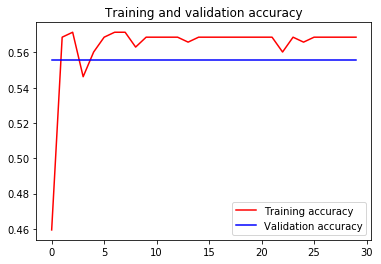

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
import cv2

In [0]:
validation_male_list = []
for name in validation_Male_fnames:
  base_dir = '/content/Cocoon Dataset/Test/Male/' + name
  img = cv2.imread(base_dir)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  matrix_test = img
  layer_name = 'dense_1'
  intermediate_layer_model = Model(input = model.input, output = model.get_layer(layer_name).output)
  intermediate_output = intermediate_layer_model.predict(matrix_test)
  intermediate_output_list = [name] + intermediate_output[0].tolist()
  validation_male_list.append(intermediate_output_list)
  
validation_male_list = np.array(validation_male_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("vg..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [0]:
validation_female_list = []
for name in validation_Female_fnames:
  base_dir = '/content/Cocoon Dataset/Test/Female/' + name
  img = cv2.imread(base_dir)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  matrix_test = img
  layer_name = 'dense_1'
  intermediate_layer_model = Model(input = model.input, output = model.get_layer(layer_name).output)
  intermediate_output = intermediate_layer_model.predict(matrix_test)
  intermediate_output_list = [name] + intermediate_output[0].tolist()
  validation_female_list.append(intermediate_output_list)
  
validation_female_list = np.array(validation_female_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("vg..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [0]:
train_male_list = []
for name in train_Male_fnames:
  base_dir = '/content/Cocoon Dataset/Train/Male/' + name
  img = cv2.imread(base_dir)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  matrix_test = img
  layer_name = 'dense_1'
  intermediate_layer_model = Model(input = model.input, output = model.get_layer(layer_name).output)
  intermediate_output = intermediate_layer_model.predict(matrix_test)
  intermediate_output_list = [name] + intermediate_output[0].tolist()
  train_male_list.append(intermediate_output_list)
  
train_male_list = np.array(train_male_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("vg..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [0]:
train_female_list = []
for name in train_Female_fnames:
  base_dir = '/content/Cocoon Dataset/Train/Female/' + name
  img = cv2.imread(base_dir)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  matrix_test = img
  layer_name = 'dense_1'
  intermediate_layer_model = Model(input = model.input, output = model.get_layer(layer_name).output)
  intermediate_output = intermediate_layer_model.predict(matrix_test)
  intermediate_output_list = [name] + intermediate_output[0].tolist()
  train_female_list.append(intermediate_output_list)
  
train_female_list = np.array(train_female_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("vg..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [0]:
intermediate_output[0]

array([0.04516411, 0.18483284, 0.16722398, ..., 0.05645609, 0.25139302,
       0.11341704], dtype=float32)

In [0]:
data = np.concatenate((validation_male_list,validation_female_list,train_male_list,train_female_list), axis=0)

In [0]:
import pandas as pd
df=pd.DataFrame(data=data[0: ,0:],
            index=[i for i in range(data.shape[0])],
            columns=['f'+str(i) for i in range(data.shape[1])])

In [0]:
df = df.rename(columns={'f0':'File Name'})
df = df.set_index('File Name')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447 entries, SK777A.jpg to 46B.jpg
Columns: 1024 entries, f1 to f1024
dtypes: object(1024)
memory usage: 3.5+ MB


In [0]:
drop_column = []
for i in range(1,1025):
  count = 0
  for each in df['f' + str(i)]:
    if float(each)<= 0.0:
      count +=1
  if count == len(df):
    drop_column.append('f' + str(i))

len(drop_column)

531

In [0]:
df = df.drop(columns = drop_column)

In [0]:
df.head()

,f1,f2,f3,f4,f6,f7,f8,f11,f12,f15,f18,f20,f21,f22,f25,f26,f28,f29,f30,f31,f32,f36,f42,f46,f48,f49,f50,f55,f56,f61,f65,f68,f71,f73,f74,f76,f77,f80,f81,f82,...,f952,f958,f959,f960,f961,f962,f963,f964,f965,f966,f967,f968,f969,f971,f973,f976,f977,f978,f979,f985,f986,f989,f990,f991,f992,f993,f994,f995,f1001,f1006,f1010,f1012,f1013,f1015,f1016,f1019,f1020,f1022,f1023,f1024
File Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SK777A.jpg,0.054964736104011536,0.22152693569660187,0.20049293339252472,0.32851511240005493,0.21281714737415314,0.0,0.14667686820030212,0.25303351879119873,0.20519188046455383,0.17950525879859924,0.3201408386230469,0.16100464761257172,0.437704861164093,0.22956152260303497,0.22313058376312256,0.10593216121196747,0.0904526337981224,0.15168622136116028,0.16904780268669128,0.20939067006111145,0.27041947841644287,0.36809247732162476,0.3033146858215332,0.10513006895780563,0.4112304449081421,0.3631654381752014,0.03901173919439316,0.04293293133378029,0.11261092126369476,0.14219503104686737,0.23406937718391418,0.31287750601768494,0.07245940715074539,0.34887418150901794,0.04583900421857834,0.32144853472709656,0.4295426309108734,0.04616404324769974,0.38390806317329407,0.29811912775039673,...,0.04921803995966911,0.3273155689239502,0.2614035904407501,0.23038695752620697,0.02460755966603756,0.28379911184310913,0.4427116811275482,0.07891993969678879,0.08609309792518616,0.3025645315647125,0.26012086868286133,0.14111961424350739,0.3430349826812744,0.3789758086204529,0.2318737804889679,0.2784707844257355,0.16018834710121155,0.24888819456100464,0.5535653233528137,0.04666895046830177,0.02123383991420269,0.17220571637153625,0.3136054575443268,0.2678583562374115,0.2527478337287903,0.08554912358522415,0.28667235374450684,0.38043150305747986,0.2430526465177536,0.14139991998672485,0.4723118841648102,0.39390692114830017,0.24714842438697815,0.0793328732252121,0.37838050723075867,0.16540636122226715,0.23263463377952576,0.06758081912994385,0.3017416000366211,0.13619039952754974
74Aa.jpg,0.06117307394742966,0.2447713166475296,0.22156760096549988,0.36321821808815,0.234822615981102,0.0007261084392666817,0.16223174333572388,0.2805018723011017,0.2268441766500473,0.1980280578136444,0.3550869822502136,0.17771035432815552,0.48466986417770386,0.2544008791446686,0.24735242128372192,0.11720367521047592,0.09972742944955826,0.16760236024856567,0.1875586062669754,0.23253385722637177,0.29898691177368164,0.40726080536842346,0.3357153534889221,0.1160888820886612,0.45508795976638794,0.4019779562950134,0.04345705360174179,0.04810976982116699,0.12534472346305847,0.1577388346195221,0.2586624324321747,0.3463777005672455,0.08037487417459488,0.3863106369972229,0.05096788704395294,0.35628628730773926,0.47487673163414,0.0508415661752224,0.4245606064796448,0.3295080065727234,...,0.05504245683550835,0.36234840750694275,0.28911641240119934,0.25566017627716064,0.02772459387779236,0.3136836588382721,0.48994362354278564,0.08758337050676346,0.09578624367713928,0.3354140818119049,0.2886212468147278,0.15637604892253876,0.3794548213481903,0.4189746081829071,0.2571336627006531,0.30866560339927673,0.17818191647529602,0.27475860714912415,0.6119040250778198,0.051834724843502045,0.02349783293902874,0.19095422327518463,0.3474618196487427,0.2970238924026489,0.2798535227775574,0.09486642479896545,0.31779417395591736,0.4207954704761505,0.2695974111557007,0.1560518443584442,0.522476851940155,0.43584734201431274,0.27313971519470215,0.08736691623926163,0.41897159814834595,0.18272027373313904,0.2582162916660309,0.07462792843580246,0.3336355686187744,0.15061648190021515
SK780B.jpg,0.06054367125034332,0.24241478741168976,0.21943102777004242,0.3596999943256378,0.2325916886329651,0.0006419690325856209,0.16065478324890137,0.27771711349487305,0.22464905679225922,0.19615021347999573,0.3515441417694092,0.17601671814918518,0.4799085259437561,0.2518826723098755,0.244896799325943,0.11606096476316452,0.09878714382648468,0.1659887731075287,0.18568196892738342,0.23

In [0]:
column_name = []
for i in range(1,494):
  column_name.append('f' + str(i))

df.columns = column_name

In [0]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493
File Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SK777A.jpg,0.054964736104011536,0.22152693569660187,0.20049293339252472,0.32851511240005493,0.21281714737415314,0.0,0.14667686820030212,0.25303351879119873,0.20519188046455383,0.17950525879859924,0.3201408386230469,0.16100464761257172,0.437704861164093,0.22956152260303497,0.22313058376312256,0.10593216121196747,0.0904526337981224,0.15168622136116028,0.16904780268669128,0.20939067006111145,0.27041947841644287,0.36809247732162476,0.3033146858215332,0.10513006895780563,0.4112304449081421,0.3631654381752014,0.03901173919439316,0.04293293133378029,0.11261092126369476,0.14219503104686737,0.23406937718391418,0.31287750601768494,0.07245940715074539,0.34887418150901794,0.04583900421857834,0.32144853472709656,0.4295426309108734,0.04616404324769974,0.38390806317329407,0.29811912775039673,...,0.04921803995966911,0.3273155689239502,0.2614035904407501,0.23038695752620697,0.02460755966603756,0.28379911184310913,0.4427116811275482,0.07891993969678879,0.08609309792518616,0.3025645315647125,0.26012086868286133,0.14111961424350739,0.3430349826812744,0.3789758086204529,0.2318737804889679,0.2784707844257355,0.16018834710121155,0.24888819456100464,0.5535653233528137,0.04666895046830177,0.02123383991420269,0.17220571637153625,0.3136054575443268,0.2678583562374115,0.2527478337287903,0.08554912358522415,0.28667235374450684,0.38043150305747986,0.2430526465177536,0.14139991998672485,0.4723118841648102,0.39390692114830017,0.24714842438697815,0.0793328732252121,0.37838050723075867,0.16540636122226715,0.23263463377952576,0.06758081912994385,0.3017416000366211,0.13619039952754974
74Aa.jpg,0.06117307394742966,0.2447713166475296,0.22156760096549988,0.36321821808815,0.234822615981102,0.0007261084392666817,0.16223174333572388,0.2805018723011017,0.2268441766500473,0.1980280578136444,0.3550869822502136,0.17771035432815552,0.48466986417770386,0.2544008791446686,0.24735242128372192,0.11720367521047592,0.09972742944955826,0.16760236024856567,0.1875586062669754,0.23253385722637177,0.29898691177368164,0.40726080536842346,0.3357153534889221,0.1160888820886612,0.45508795976638794,0.4019779562950134,0.04345705360174179,0.04810976982116699,0.12534472346305847,0.1577388346195221,0.2586624324321747,0.3463777005672455,0.08037487417459488,0.3863106369972229,0.05096788704395294,0.35628628730773926,0.47487673163414,0.0508415661752224,0.4245606064796448,0.3295080065727234,...,0.05504245683550835,0.36234840750694275,0.28911641240119934,0.25566017627716064,0.02772459387779236,0.3136836588382721,0.48994362354278564,0.08758337050676346,0.09578624367713928,0.3354140818119049,0.2886212468147278,0.15637604892253876,0.3794548213481903,0.4189746081829071,0.2571336627006531,0.30866560339927673,0.17818191647529602,0.27475860714912415,0.6119040250778198,0.051834724843502045,0.02349783293902874,0.19095422327518463,0.3474618196487427,0.2970238924026489,0.2798535227775574,0.09486642479896545,0.31779417395591736,0.4207954704761505,0.2695974111557007,0.1560518443584442,0.522476851940155,0.43584734201431274,0.27313971519470215,0.08736691623926163,0.41897159814834595,0.18272027373313904,0.2582162916660309,0.07462792843580246,0.3336355686187744,0.15061648190021515
SK780B.jpg,0.06054367125034332,0.24241478741168976,0.21943102777004242,0.3596999943256378,0.2325916886329651,0.0006419690325856209,0.16065478324890137,0.27771711349487305,0.22464905679225922,0.19615021347999573,0.3515441417694092,0.17601671814918518,0.4799085259437561,0.2518826723098755,0.244896799325943,0.11606096476316452,0.09878714382648468,0.1659887731075287,0.18568196892738342,0.2301875799894333

In [0]:
 df.to_excel('output.xlsx')